<a href="https://colab.research.google.com/github/ysabellelam/Python-Data-Products-for-Predictive-Analytics/blob/master/HeartAttackClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data Imported from https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [ ]:
from google.colab import files
uploaded = files.upload()

import csv
df = pd.read_csv("./heart_failure_clinical_records_dataset.csv")

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


This Dataset has been pre cleaned from https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Data Visualization

In [ ]:
import plotly.express as px
fig = px.pie(df, names='DEATH_EVENT', title='Distribution of Death in Patients',width=600, height=400)
fig.show()

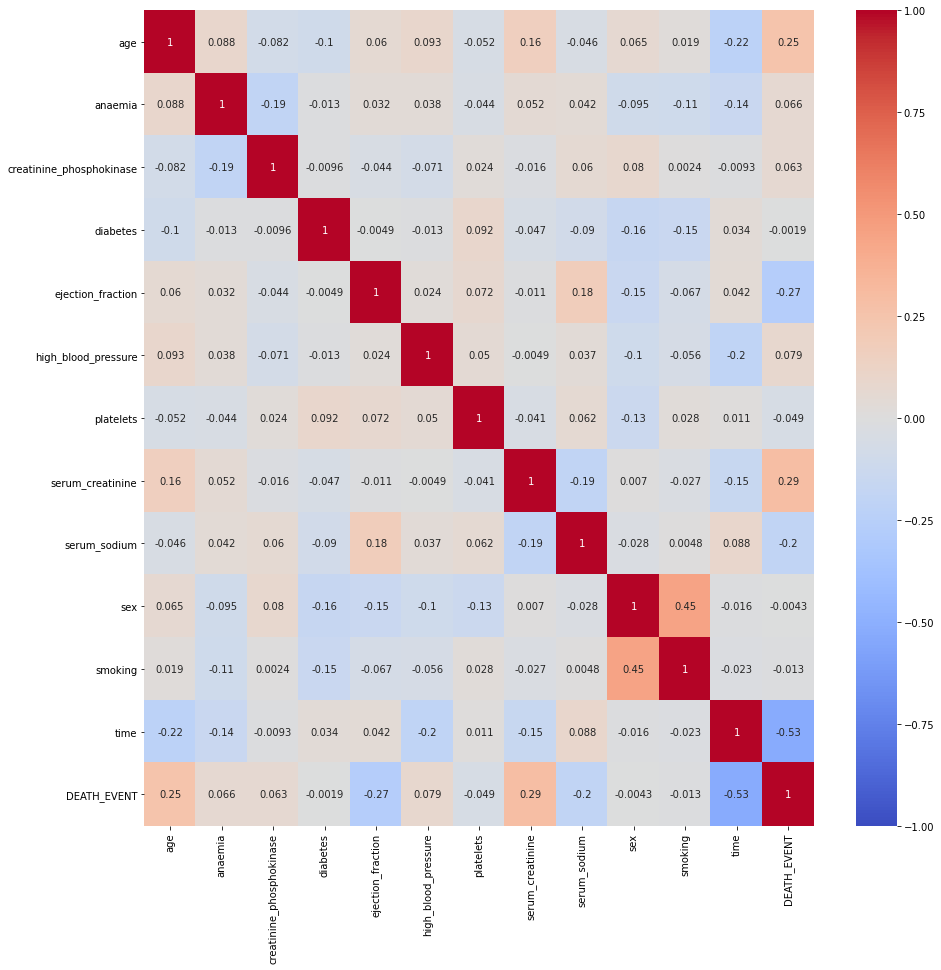

In [ ]:
corr = df.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [ ]:
x = df[['age','ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
y = df['DEATH_EVENT']

#Spliting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

## Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)
p1=lr.predict(x_test)
s1=accuracy_score(y_test,p1)
print("Linear Regression Success Rate :", "{:.2f}%".format(100*s1))

Linear Regression Success Rate : 88.33%


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
p4=svm.predict(x_test)
s4=accuracy_score(y_test,p4)
print("Support Vector Machine Success Rate :", "{:.2f}%".format(100*s4))

Support Vector Machine Success Rate : 90.00%


### K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
scorelist=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    p5=knn.predict(x_test)
    s5=accuracy_score(y_test,p5)
    scorelist.append(round(100*s5, 2))
print("K Nearest Neighbors Top 5 Success Rates:")
print(sorted(scorelist,reverse=True)[:5])

K Nearest Neighbors Top 5 Success Rates:
[93.33, 91.67, 91.67, 90.0, 90.0]
